# Malaria Detection

A deep learning model classifying whether if a person is diagnosed with malaria.

**Datasets**: [Malaria datasets](https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria)

---

## Dependencies

In [33]:
from torchvision import datasets

from sklearn.model_selection import train_test_split

import os
import shutil
from pathlib import Path

---

## Importing Dataset

Loading the malaria dataset in using `pathlib.Path`.
* This dataset is **not** categorised into train/val/test, currently it is **data/[class]**.

Splitting data into **train**/**val**/**test**.

In [ ]:
def move_imgs()

def split_data(data_path:Path, train_split:int, val_split:int, test_split:int):
    assert train_split + val_split + test_split == 1.0, "Sum of the splits should be 1."
    
    # Fetching all data with extension ".png"
    parasitized_imgs = list((data_path / 'Parasitized').glob('*.png'))
    uninfected_imgs = list((data_path / 'Uninfected').glob('*.png'))
    
    # Splitting training data - Parasitized
    parasitized_train, parasitized_temp = train_test_split(parasitized_imgs, test_size=(val_split + test_split))
    # Splitting validation & test data - Parasitized
    parasitized_val, parasitized_test = train_test_split(parasitized_temp, test_size=(test_split / (val_split + test_split)))
    
    # Splitting training data - Uninfected
    uninfected_train, uninfected_temp = train_test_split(uninfected_imgs, test_size=(val_split + test_split))
    # Splitting validation & test data - Uninfected
    uninfected_val, uninfected_test = train_test_split(uninfected_temp, test_size=(test_split / (val_split + test_split)))
    
    # Creating folders for train/val/test
    train_path = data_path / 'train'
    val_path = data_path / 'val'
    test_path = data_path / 'test'
    
    if not train_path.exist() or not val_path.exists() or not test_path.exists():
        train_path.mkdir(exist_ok=True)
        val_path.mkdir(exist_ok=True)
        test_path.mkdir(exist_ok=True)
        
        

In [29]:
data_path = Path('data')

data = datasets.ImageFolder(root=data_path)
class_names = data.classes

In [31]:
for data in os.listdir('data'):
    print(data)

Parasitized


In [20]:
train_dataset, train_dataset_info = tfds.load('malaria', 
                                    with_info=True, 
                                    as_supervised=True, 
                                    shuffle_files=True, 
                                    split=['train'])

Checking the loaded train dataset.

In [21]:
train_dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [22]:
for train_data in train_dataset[0].take(1): # Taking 1 data snapshot
    print(train_data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)


In [23]:
len(train_dataset[0])

27558

There are total of **27,558** training images.

### Splitting the dataset

In [6]:
dataset_info = train_dataset_info

In [7]:
def split_dataset(dataset:tf.data.Dataset, TRAIN_SPLIT:int, VAL_SPLIT:int, TEST_SPLIT:int) -> Tuple:
    dataset_len = len(dataset)

    train_dataset = dataset.take(int(TRAIN_SPLIT*dataset_len))

    # Skipping the part assigned for train dataset
    val_test_dataset = dataset.skip(int(TRAIN_SPLIT*dataset_len))

    val_dataset = val_test_dataset.take(int(VAL_SPLIT*dataset_len))

    test_dataset = val_test_dataset.skip(int(VAL_SPLIT*dataset_len))
    
    return train_dataset, val_dataset, test_dataset

In [8]:
train_dataset, val_dataset, test_dataset = split_dataset(train_dataset[0], 0.8, 0.1, 0.1)

print(len(list(train_dataset.as_numpy_iterator())), 
      len(list(val_dataset.as_numpy_iterator())), 
      len(list(test_dataset.as_numpy_iterator())))

---

## Visualising Dataset

Viewing *dataset_info* to retrieve useful image attributes.

In [9]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='C:\\Users\\linta\\tensorflow_datasets\\malaria\\1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin 

Plotting 16 datasets for visualisation purposes.

Label [0] - parasitized
Label [1] - uninfected


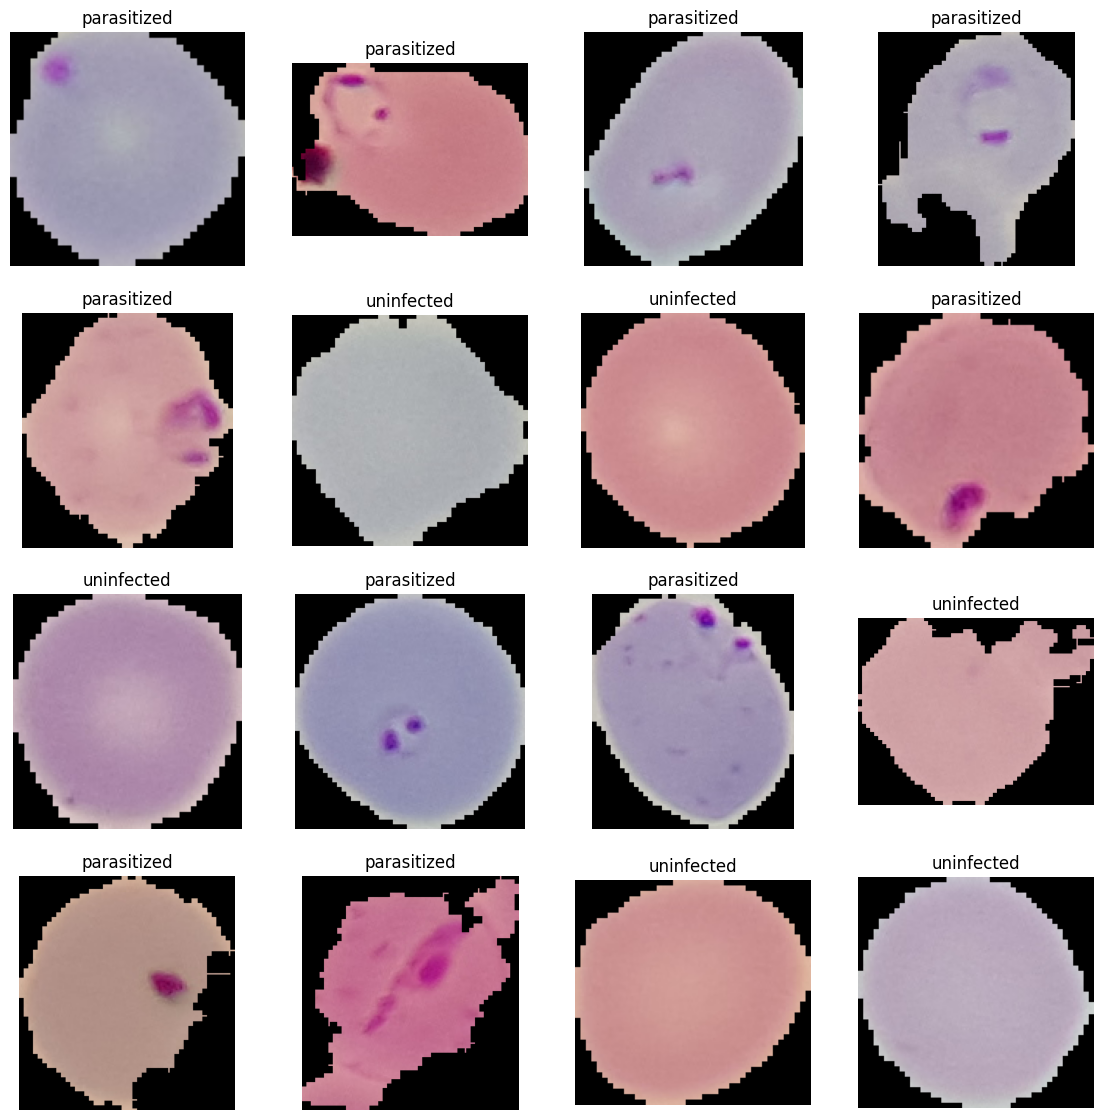

In [10]:
plt.figure(figsize=(14, 14))

for idx, (img, label) in enumerate(train_dataset.take(16)):
    plt.subplot(4, 4, idx+1)
    plt.imshow(img)
    plt.title(dataset_info.features['label'].int2str(label))
    plt.axis(False)
    
print(f"Label [0] - {dataset_info.features['label'].int2str(0)}")
print(f"Label [1] - {dataset_info.features['label'].int2str(1)}")

---

## Data Preprocessing

1. Fixing the images to fixed sizes: **224 x 224**.

2. Normalising the images.
    * For images where most of pixels are at around at **particular mean value** -> Standardisation
    * For images where most of pixels are **mostly different** -> Normalisation

### Resizing and normalising the image data

In [11]:
def preprocess_img(img, label, resize_H=224, resize_W=224):
    return tf.image.resize(img, (resize_H, resize_W))/255.0, label

In [12]:
train_dataset = train_dataset.map(preprocess_img)

In [13]:
for img, label in train_dataset.take(1):
    print(img, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(0, shape=(), dtype=int64)


The shape is now **(224, 224, 3)**.

---

## Training Preparation

### Setting up the intial model

Initially setting up the model as LeNet architecture.
* For experiment purposes.

In [15]:
model = tf.keras.Sequential([InputLayer(input_shape=(224, 224, 3)),
                             Conv2D(filters=6,
                                    kernel_size=5,
                                    strides=1,
                                    padding='valid',
                                    activation='sigmoid'),
                             MaxPool2D(pool_size=2, strides=2),
                             
                             Conv2D(filters=16,
                                    kernel_size=5,
                                    strides=1,
                                    padding='valid',
                                    activation='sigmoid'),
                             MaxPool2D(pool_size=2, strides=2),
                             
                             Flatten(),
                             
                             Dense(100, activation='sigmoid'),
                             Dense(10, activation='sigmoid'),
                             Dense(1, activation='sigmoid'),
                             ])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 220, 220, 6)       456       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 44944)             0         
                                                                 
 dense_3 (Dense)             (None, 100)              

### Model Compilation

**Optimizer**
* The optimizer used is **AdaM88.

**Loss Function**
* The loss function to be used for this case is **Binary Cross Entropy**.
* `tf.keras.losses.BinaryCrossentropy()`

Example of using Binary Cross Entropy.

In [16]:
y_true = [0, 1, 0, 0]
y_pred = [0.6, 0.51, 0.94, 1]
bce = BinaryCrossentropy()
bce(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=4.9340706>

In [17]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss=BinaryCrossentropy())

In [18]:
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=100,
                    verbose=1)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\linta\anaconda3\envs\general\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\linta\anaconda3\envs\general\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\linta\anaconda3\envs\general\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\linta\anaconda3\envs\general\Lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\linta\anaconda3\envs\general\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\linta\anaconda3\envs\general\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(224, 224, 3)
